<a href="https://colab.research.google.com/github/MartaPCastillo/Simulacion-I/blob/main/Experimento_Aguja_de_Buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experimento de la Aguja de Buffon

La aguja de Buffon es un clásico problema de probabilidad geométrica, de realización práctica y cuyo interés radica en que es un método fácil para ir aproximando el valor del número π a partir de sucesivos intentos. Fue planteado por el naturalista francés Buffon en 1733 y reproducido por él mismo ya resuelto en 1777.

Este experimento consiste en dejar caer una aguja sobre una hoja rayada y anotar las veces que la aguja cruza alguna de las rayas. Después de lanzar la aguja muchísimas veces comprobó que su experimento estaba íntimamente relacionado con el número $\pi$. Para obtener un número muy parecido a $\pi$, hay que dejar caer la aguja muchísimas veces sobre la hoja, multiplicar esta cantidad por dos y dividir el resultado entre el número de veces que la aguja cruzó alguna de las rayas.

El planteamiento matemático de este problema es:

Sea una aguja de longitud $\ell$ lanzada sobre un plano segmentado por líneas paralelas separadas $t$ unidades. ¿Cuál es la probabilidad que la aguja cruce alguna línea?.

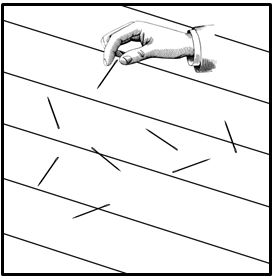

### 1. Identifique las variables

Tenemos:

$x$ la distancia entre el centro de la aguja y la línea más cercana, $x \in [0,t/2]$, y

$\theta$ el ángulo entre la aguja y las líneas, $\theta \in [0,\pi /2]$.

También es importante hacer ver que esta solución es para el caso cuando $t\geq \ell$ (las agujas miden menos que la distancia entre las líneas).

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

La variable aleatoria $x$ se distribuye uniformemente (de forma continua) entre el 0 y $\dfrac{t}{2}$, por lo que su función de densidad de probabilidad es:

$f_X(x)= \dfrac{2}{t} dx$

Por su parte, la variable aleatoria $\theta$, al igual que $x$ se distribuye uniformemente entre 0 y $\dfrac{\pi}{2}$, por lo que su función de densidad de probabilidad es:

$f_\Theta(\theta)= \dfrac{2}{\pi} d\theta$

Al $x$ y $\theta$ ser variables aleatorias independientes, la función conjunta de densidad es simplemente el producto de ambas:

$f_{X,\Theta }(x,\theta )={\frac {4}{t\pi }}\,dx\,d\theta$

### 4. Defina el modelo del sistema y los objetivos de la simulación

La condición para que una aguja cruce una línea es: $x\leq {\frac {\ell }{2}}\,\sin \theta$

Ahora se busca la función de probabilidad de este problema, la cual se obtiene integrando para ambas variables la función de densidad, lo cual es:

$\int _{\theta =0}^{\frac {\pi }{2}}\int _{x=0}^{(\ell /2)\sin \theta }{\frac {4}{t\pi }}\,dx\,d\theta ={\frac {2\ell }{t\pi }}$

Si se lanzan $n$ agujas y $h$ cruzan alguna línea, se tiene que:

${\frac {h}{n}}\approx {\frac {2\ell }{t\pi }}$


De donde despejando $\pi$, tenemos:

$\pi \approx {\frac {2n\ell }{ht}}$

###Simulación

In [6]:
import numpy as np
import random as rnd
import math
import matplotlib.pyplot as plt

In [7]:
def lanzar_aguja(longitud_aguja, distancia_lineas):
    # Centro de la aguja
    x_centro = np.random.uniform(0, distancia_lineas / 2)
    # Ángulo entre la aguja y las líneas paralelas
    theta = np.random.uniform(0, np.pi / 2)

    # Distancia del centro de la aguja a la línea más cercana
    x_final = x_centro - (longitud_aguja / 2) * np.sin(theta)

    # La aguja cruza una línea si x_final <= 0
    return x_final <= 0

In [24]:
def estimar_pi(num_experimentos, longitud_aguja, distancia_lineas):
    cruza_linea = 0
    lista = []
    for _ in range(num_experimentos):
        if lanzar_aguja(longitud_aguja, distancia_lineas):
            cruza_linea += 1

    # Probabilidad de que la aguja cruce una línea
    probabilidad_cruce = cruza_linea / num_experimentos

    # Estimación de pi usando la fórmula de Buffon
    pi_estimado = (2 * longitud_aguja) / (distancia_lineas * probabilidad_cruce)

    return pi_estimado

In [25]:
# Parámetros del experimento
num_experimentos = 100000
longitud_aguja = 1.0
distancia_lineas = 1.0

In [26]:
# Estimación de pi
pi_estimado = estimar_pi(num_experimentos, longitud_aguja, distancia_lineas)
print(f'Estimación de pi: {pi_estimado}')

Estimación de pi: 3.137058066944819
